Simulation cell parameters

In [1]:
Nx = 128; dx = 1.0; 

Time integration parameters:

In [2]:
nstep = 600; nprint = 200; dtime = 0.2

0.2

Initialize temperature field and grid:

In [32]:
u0 = zeros(Nx)
x = zeros(Nx)
for i = 1 : Nx
    u0[i] = 0.0
    x[i] = i * dx
    if ((i >= 44) && (i <= 84))
        u0[i] = 1.0
    end
end

Evolve temperature field:

In [33]:
using Plots
ncount = 0
for istep = 1:nstep
    for i = 2:Nx-1
        u0[i] = u0[i] + dtime*(u0[i+1]-2.0*u0[i]+u0[i-1])/(dx^2)
    end
    
    # Display results
    if ((mod(istep,nprint) == 0) || (istep == 1))
        ncount = ncount + 1
        plot!([0;x;1],[0;u0;0])
    end
end

        
    

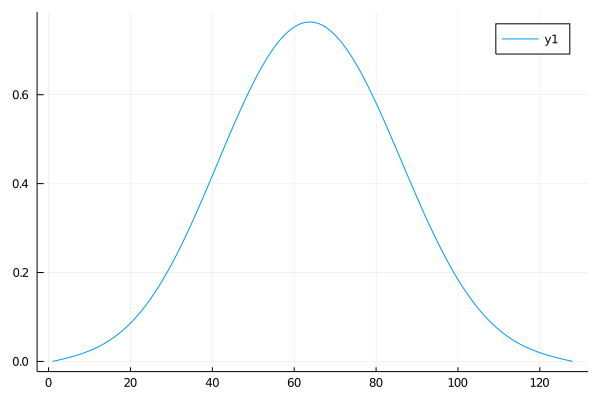

In [34]:
plot(x,u0)

Using the differential operator to calculate Laplacian

In [35]:
using DiffEqOperators
# Second order approximation to second derivative
order = 2
deriv = 2
dx = 1.0
A = CenteredDifference(order,deriv, dx, Nx)

DerivativeOperator{Float64,1,false,Float64,StaticArrays.SArray{Tuple{3},Float64,1,3},StaticArrays.SArray{Tuple{0},StaticArrays.SArray{Tuple{4},Float64,1,4},1,0},Nothing,Nothing}(2, 2, 1.0, 128, 3, [1.0, -2.0, 1.0], 4, 0, StaticArrays.SArray{Tuple{4},Float64,1,4}[], StaticArrays.SArray{Tuple{4},Float64,1,4}[], nothing, nothing)

In [36]:
u0 = zeros(Nx); u0[44:84] .= 1.0;

In [37]:
for istep = 1:nstep
    u0[2:Nx-1] = u0[2:Nx-1] + dtime * A * u0
end

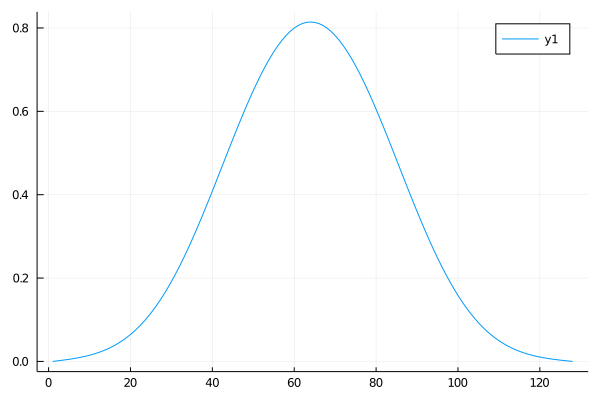

In [38]:
plot(x,u0)